## Advance Regression using Ridge & Lasso

### Problem Statement :
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know 

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Determine the optimal value of lambda for ridge and lasso regression.

For the same purpose, the company has collected a data set from the sale of houses in Australia.

### Business Goal :

- Model the price of houses with the available independent variables.
- Understand how exactly the prices vary with the variables.
- Manipulate the strategy of the firm and concentrate on areas that will yield high returns on investment.
- Understand the pricing dynamics of a new market.

### Steps to be performed :
- Loading, verifying and Understanding the given data.
- Data cleaning / imputing for increasing the data quality.
- Data visualization for highlighting the trends, patterns & outliers. 
- Data preparation to ensure accuracy of data.
- Train-Test splitting
- Initial Recursive Feature Elimination
- Model Building and Evaluation
- Linear Regression and VIF
- Ridge Regression & Lasso Regression

In [1]:
# Supressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing basic libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)
pd.set_option('precision',2)

In [3]:
# Importing additional libraries from sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 1. Loading, verifying and Understanding the given data.

In [4]:
# Importing the dataset from the given CSV file

df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Checking the data types of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking the number of columns and rows

df.shape

(1460, 81)

In [7]:
# Describing the dataframe for verifying the distribution of numerical columns

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


### 2. Data Cleaning / Imputing

In [8]:
# Checking the number of null value in columns

df.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
dtype: int64

##### We could see that a total of 19 columns are havig Null values. Each of these columns shall be verified to see the data distribution and to decide how to handle them.

In [9]:
df.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [10]:
df.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [11]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [12]:
df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

#### The value counts of the above columns reveal that these columns contain majority of NA values.  Hece it would not be rational to incorporate these columns as predictors. Hence dropping these columns.

In [13]:
df=df.drop('PoolQC',axis=1)

In [14]:
df=df.drop('MiscFeature',axis=1)

In [15]:
df=df.drop('Alley',axis=1)

In [16]:
df=df.drop('Fence',axis=1)

#### The column FireplaceQu contains significant number of non Null values. Hence, these columns shall be imputed with "Not Available" instead of "NA"

In [17]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [18]:
df['FireplaceQu'].replace(np.nan,'not_available',inplace=True)

In [19]:
# Checking the column after replacing the values

df.FireplaceQu.value_counts()

not_available    690
Gd               380
TA               313
Fa                33
Ex                24
Po                20
Name: FireplaceQu, dtype: int64

#### The data type of LotFrontage is Float64. Hence checking the data distribution of this column to see whether the data is skewed or not.

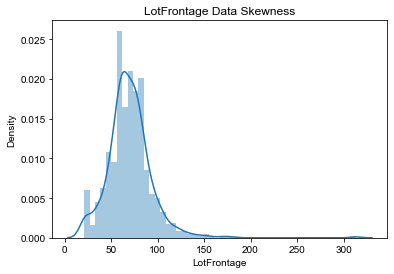

In [20]:
sns.distplot(df.LotFrontage).set(title='LotFrontage Data Skewness')
sns.set(style="whitegrid")
plt.show()

In [21]:
# Checking the null value percentage

df.LotFrontage.isnull().sum()/df.shape[0]*100

17.73972602739726

As the data is right skewed and the column is haivng 17% null values, let's replace the NA values with the median value of this column. 

In [22]:
df.LotFrontage.replace(np.nan,df.LotFrontage.median(),inplace=True)

The following 6 columns represent data related to Garage:-

- GarageYrBlt: Year garage was built
- GarageCond: Garage condition
- GarageType: Garage location
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageQual: Garage quality

Checking individually to find the NA value counts of each column

In [23]:
print(df['GarageYrBlt'].isnull().sum())
print(df['GarageCond'].isnull().sum())
print(df['GarageType'].isnull().sum())
print(df['GarageFinish'].isnull().sum())
print(df['GarageCars'].isnull().sum())
print(df['GarageQual'].isnull().sum())

81
81
81
81
0
81


In [24]:
# Checking the data distribution of Garage Cars as it is showing NA = 0

df['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

GarageCars is having 81 0 values. No need to impute this column as it is not hving "NA" values

From the above analysis, we could understand that 81 properties doesn't have Garage. 
Hence imputing all the NA values in Garage related columns (except GarageCars and GarageYrBlt) with No_Garage.

In [25]:
df.GarageCond.replace(np.nan,'No_Garage',inplace=True)
df.GarageType.replace(np.nan,'No_Garage',inplace=True)
df.GarageFinish.replace(np.nan,'No_Garage',inplace=True)
df.GarageQual.replace(np.nan,'No_Garage',inplace=True)

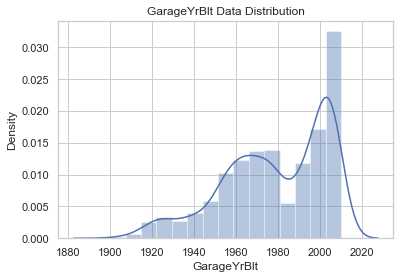

In [26]:
#check the data distribution of 'GarageYrBlt' column

sns.distplot(df.GarageYrBlt).set(title='GarageYrBlt Data Distribution')
sns.set(style="whitegrid")
plt.show()

GarageYrBlt, seems to be a significant predictor and hence shall not be dropped. Hence the safest option would be to get derived variable out of this column.

- 1: GarageYrBlt<2000 (Old Garage)
- 2: GarageYrBlt>=2000 (New Garage)

In [27]:
#function to get the derived metric

def func(x):
    if x<2000:
        return 1
    if x>=2000:
        return 2
    if str(x)=='nan':
        return 0
df['GarageYrBlt']=df.GarageYrBlt.apply(func)

In [28]:
# Checking the data after imputing

df.GarageYrBlt.value_counts()

1    977
2    402
0     81
Name: GarageYrBlt, dtype: int64

#### Analysing the columns related to Basement

In [29]:
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [30]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [31]:
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [32]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [33]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [34]:
# Imputing NAN values with 'No_Basement' for all 5 columns

df.BsmtFinType2.replace(np.nan,'No_Basement',inplace=True)
df.BsmtExposure.replace(np.nan,'No_Basement',inplace=True)
df.BsmtFinType1.replace(np.nan,'No_Basement',inplace=True)
df.BsmtCond.replace(np.nan,'No_Basement',inplace=True)
df.BsmtQual.replace(np.nan,'No_Basement',inplace=True)

Doing a sanity check for all the basement related columns

In [35]:
df.BsmtFinType2.value_counts()

Unf            1256
Rec              54
LwQ              46
No_Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [36]:
df.BsmtExposure.value_counts()

No             953
Av             221
Gd             134
Mn             114
No_Basement     38
Name: BsmtExposure, dtype: int64

In [37]:
df.BsmtFinType1.value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No_Basement     37
Name: BsmtFinType1, dtype: int64

In [38]:
df.BsmtCond.value_counts()

TA             1311
Gd               65
Fa               45
No_Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [39]:
df.BsmtQual.value_counts()

TA             649
Gd             618
Ex             121
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64

From the sanity check, we can understand that there is some data anomaly in these columns. We could see taht the columns BsmtFinType2 and BsmtExposure are showing 38 No_Basement values but the remaining columns are showing only 37.

In [40]:
# Doing further analysis

df[(df.BsmtFinType2=='No_Basement') & (df.BsmtExposure=='No_Basement')].shape

(37, 77)

In [41]:
df[(df.BsmtFinType2=='No_Basement')].shape

(38, 77)

In [42]:
df[(df.BsmtExposure=='No_Basement')].shape

(38, 77)

In [43]:
df[(df.BsmtFinType1=='No_Basement') & (df.BsmtCond=='No_Basement') & (df.BsmtQual=='No_Basement')].shape

(37, 77)

As we suspect data corruption in BsmtFinType2 & BsmtExposure columns, we will drop those 2 rows.

In [44]:
dd1=df[(df.BsmtFinType2=='No_Basement')]
dd2=df[(df.BsmtFinType1=='No_Basement') & (df.BsmtCond=='No_Basement') & (df.BsmtQual=='No_Basement')]
dd1[~dd1.isin(dd2)].dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333.0,20.0,RL,85.0,10655.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8.0,5.0,2003.0,2004.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,No_Basement,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629.0,0.0,0.0,1629.0,1.0,0.0,2.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Attchd,2.0,RFn,3.0,880.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2009.0,WD,Normal,284000.0


In [45]:
dd1=df[(df.BsmtExposure=='No_Basement')]
dd2=df[(df.BsmtFinType1=='No_Basement') & (df.BsmtCond=='No_Basement') & (df.BsmtQual=='No_Basement')]
dd1[~dd1.isin(dd2)].dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949.0,60.0,RL,65.0,14006.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2002.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,No_Basement,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936.0,840.0,0.0,1776.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,TA,Attchd,2.0,RFn,2.0,474.0,TA,TA,Y,144.0,96.0,0.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Normal,192500.0


From the above analysis, it is clear that Row Id 333.0 & 949.0 has erroneous basement related data. Hence dropping these two rows

In [46]:
# Dropping the erroneous data

df=df[(df.Id!=333.0) & (df.Id!=949.0)]

In [47]:
# Checking column MasVnrArea

df.MasVnrArea.isnull().sum()/df.shape[0]*100

0.5486968449931412

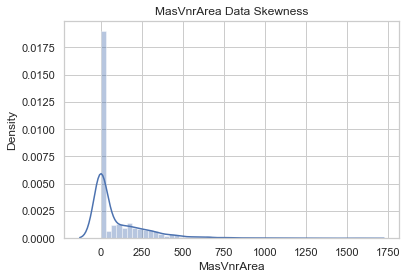

In [48]:
# Checking the skewness of data

sns.distplot(df.MasVnrArea).set(title='MasVnrArea Data Skewness')
sns.set(style="whitegrid")
plt.show()

In [49]:
# As the data is skewed to the right, we will impute the NA using median

df.MasVnrArea.replace(np.nan,df.MasVnrArea.median(),inplace=True)

In [50]:
# Checking MasVnrType colum

df.MasVnrType.value_counts()

None       864
BrkFace    443
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [51]:
# Checking the null value percentage

df.MasVnrType.isnull().sum()/df.shape[0]*100

0.5486968449931412

In [52]:
# Replacing the Null values with None

df.MasVnrType.replace(np.nan,'None',inplace=True)

In [53]:
# Checking the Electrical column

df.Electrical.value_counts()

SBrkr    1332
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [54]:
# Checking null value percentage

df.Electrical.isnull().sum()

1

In [55]:
# As there in only 1 NA value, replacing it with mode

df.Electrical.replace(np.nan,df.Electrical.mode()[0],inplace=True)

In [56]:
# Checking the column MoSold

df.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     88
11     79
9      63
12     59
1      58
2      51
Name: MoSold, dtype: int64

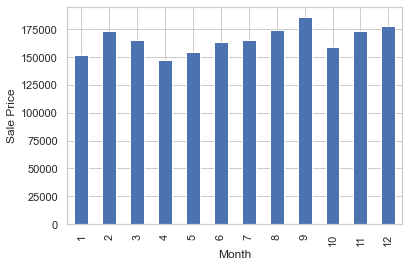

In [57]:
# Checking monthly sales pattern

df.groupby('MoSold').SalePrice.median().plot.bar()
plt.ylabel('Sale Price')
plt.xlabel('Month')
plt.show()

In [58]:
# As we do not see any price pattern, dropping this column

df.drop('MoSold',axis=1,inplace=True)

#### We have YearBuilt, YearRemodAdd & YrSold columns showing the year built, remodelled and sold data. Let's try to find the relation between house age and sales price

#### From the given data, we can understand that YrSold column should be always greater than YearBuilt and YearRemodAdd. Let's check the data once to make sure that we don't have any errors in the data provided.

In [59]:
(df.YearBuilt>df.YrSold).sum()

0

In [60]:
(df.YearRemodAdd<df.YearBuilt).sum()

0

In [61]:
(df.YearRemodAdd>df.YrSold).sum()

1

In [62]:
# Checking the erroneous data

print(df[df.YearRemodAdd>df.YrSold].YearRemodAdd)
print(df[df.YearRemodAdd>df.YrSold].YrSold)

523    2008
Name: YearRemodAdd, dtype: int64
523    2007
Name: YrSold, dtype: int64


In [63]:
# We could see that there is one row having wrong data. Let's drop it

df=df[df.YearRemodAdd<=df.YrSold]

#### Here, we would like to assume that the older the building, the lower the selling price.

We are having two columns YearBuilt and YearRemodAdd. Let's define two columns house_age1 and house_age2 for finding the relationship between these columns and selling price

In [64]:
# Taking the difference of Year Sold and Year build

df['house_age1']=df.YrSold-df.YearBuilt

In [65]:
# Cheking the data distribution

df.house_age1.describe()

count    1457.00
mean       36.62
std        30.24
min         0.00
25%         8.00
50%        35.00
75%        54.00
max       136.00
Name: house_age1, dtype: float64

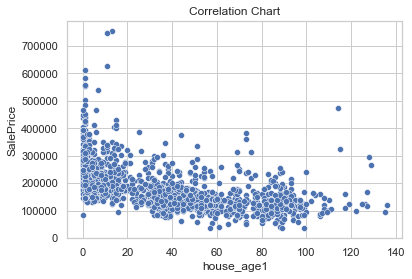

In [66]:
# Plotting to check the relation between SalePrice and house_age1.

sns.scatterplot(x=df.house_age1,y=df.SalePrice).set(title='Correlation Chart')
plt.show()

##### We could see that there is a negative linear relation between the two variables.

In [67]:
# Now let's check the difference between Year of remodelling and Year sold

df['house_age2']=df.YrSold-df.YearRemodAdd

In [68]:
# Cheking the data distribution

df.house_age2.describe()

count    1457.00
mean       22.99
std        20.64
min         0.00
25%         4.00
50%        14.00
75%        41.00
max        60.00
Name: house_age2, dtype: float64

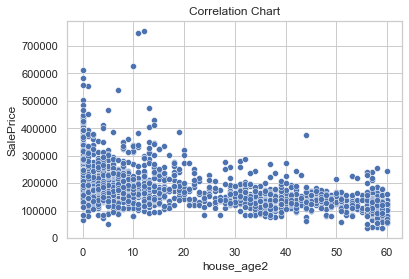

In [69]:
# Plotting to see the relationship between SalePrice and house_age2

sns.scatterplot(df.house_age2,df.SalePrice).set(title='Correlation Chart')
plt.show()

##### We could see a much stronger negative linear relationship between Remodelled date and Sales Price. So lets use house_age2 for our model building. We can drop YearBuilt, YearRemodAdd, YrSold & house_age1 columns.

In [70]:
df.drop(['YearBuilt', 'YearRemodAdd','house_age1','YrSold'], axis=1,inplace=True)

### Checking for columns having more than 85% skewed values. These columns shall be removed from the dataframe

In [71]:
# Check for columns with more that 85% same values and drop them

cols=df.select_dtypes(['int64','float64','object']).columns
skewed_cols={}
for col in cols:
    if max(list(df[col].value_counts(normalize=True).sort_values(ascending=False).head(1)))>=0.85:
        skewed_cols[col]=round(max(list(df[col].value_counts(normalize=True).sort_values(ascending=False).head(1))),2)
pd.DataFrame({'Features':list(skewed_cols.keys()),'Percentage':list(skewed_cols.values())})

,Features,Percentage
0,Street,1.00
1,LandContour,0.90
2,Utilities,1.00
3,LandSlope,0.95
4,Condition1,0.86
5,Condition2,0.99
6,RoofMatl,0.98
7,ExterCond,0.88
8,BsmtCond,0.90
9,BsmtFinType2,0.86


In [72]:
df.drop(list(skewed_cols.keys()),axis=1,inplace=True)

##### Outlier treatment

Creating a dataframe containing the predictors and outlier%.

In [73]:
numeric_cols=df.select_dtypes(['int64','float64']).columns
outliers_per_dict={}
for i in numeric_cols:
    IQR=df[i].quantile(.75)-df[i].quantile(.25)
    outliers_count=df[(df[i]>(df[i].quantile(.75)+1.5*IQR)) | (df[i]<(df[i].quantile(.25)-1.5*IQR))].shape[0]
    total=df.shape[0]
    outliers_per=round(outliers_count/total*100,2)
    outliers_per_dict[i]=outliers_per
outlier_df=pd.DataFrame({'Features':list(outliers_per_dict.keys()),'Percentage':list(outliers_per_dict.values())})
outlier_df

,Features,Percentage
0,Id,0.00
1,MSSubClass,7.07
2,LotFrontage,7.21
3,LotArea,4.60
4,OverallQual,0.14
5,OverallCond,8.58
6,MasVnrArea,6.66
7,BsmtFinSF1,0.41
8,BsmtUnfSF,1.99
9,TotalBsmtSF,4.05


Checking the percentage of data left in the dataframe after removing Outliers

In [74]:
df2=df
for i in numeric_cols:
    IQR=df2[i].quantile(.75)-df2[i].quantile(.25)
    df2=df2[(df2[i]<(df2[i].quantile(.75)+1.5*IQR)) & (df2[i]>(df2[i].quantile(.25)-1.5*IQR))]
df2.shape[0]/df.shape[0]*100

58.40768702814001

So after removing outliers based in IQR, we are left with only 58.64% of the original data. Here we see that there is no excess outliers in any of the numeric columns.

### Checking the target variable whether it is normally distributed

Text(0.5, 1.0, 'Before Transformation')

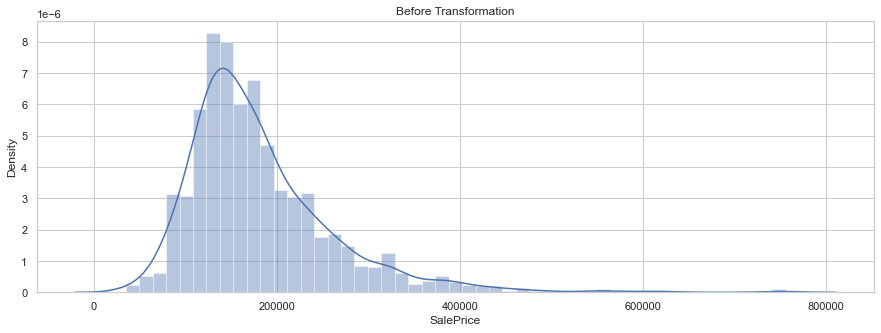

In [75]:
# Plotting distribution of 'SalePrice' before transformation

plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.distplot(df['SalePrice'])
plt.title('Before Transformation')

Let's do a data transformaion for the skewed target variable by taking log.

Text(0.5, 1.0, 'After Log Transformation')

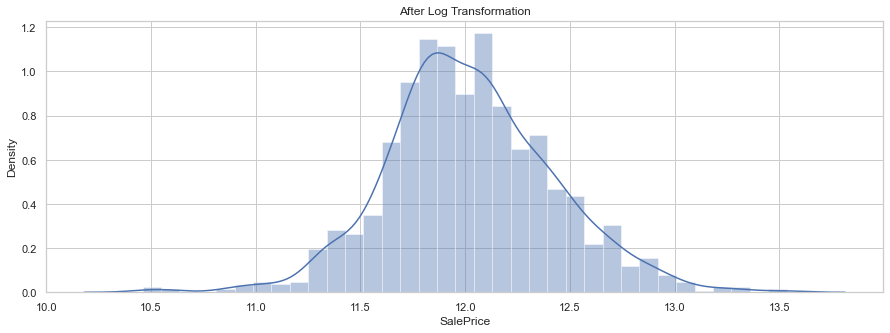

In [76]:
# Plotting distribution of 'log(SalePrice)' after transformation

plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.distplot(np.log(df['SalePrice']))
plt.title('After Log Transformation')

We can observe that by applying log transformation on target column, we can achieve normal distribution of data. Hence transforming the SalePrice column using Log.

In [77]:
# Modifying the Sales Price column using Log

df['SalePrice']=np.log(df['SalePrice'])

### 3. Data Visualization

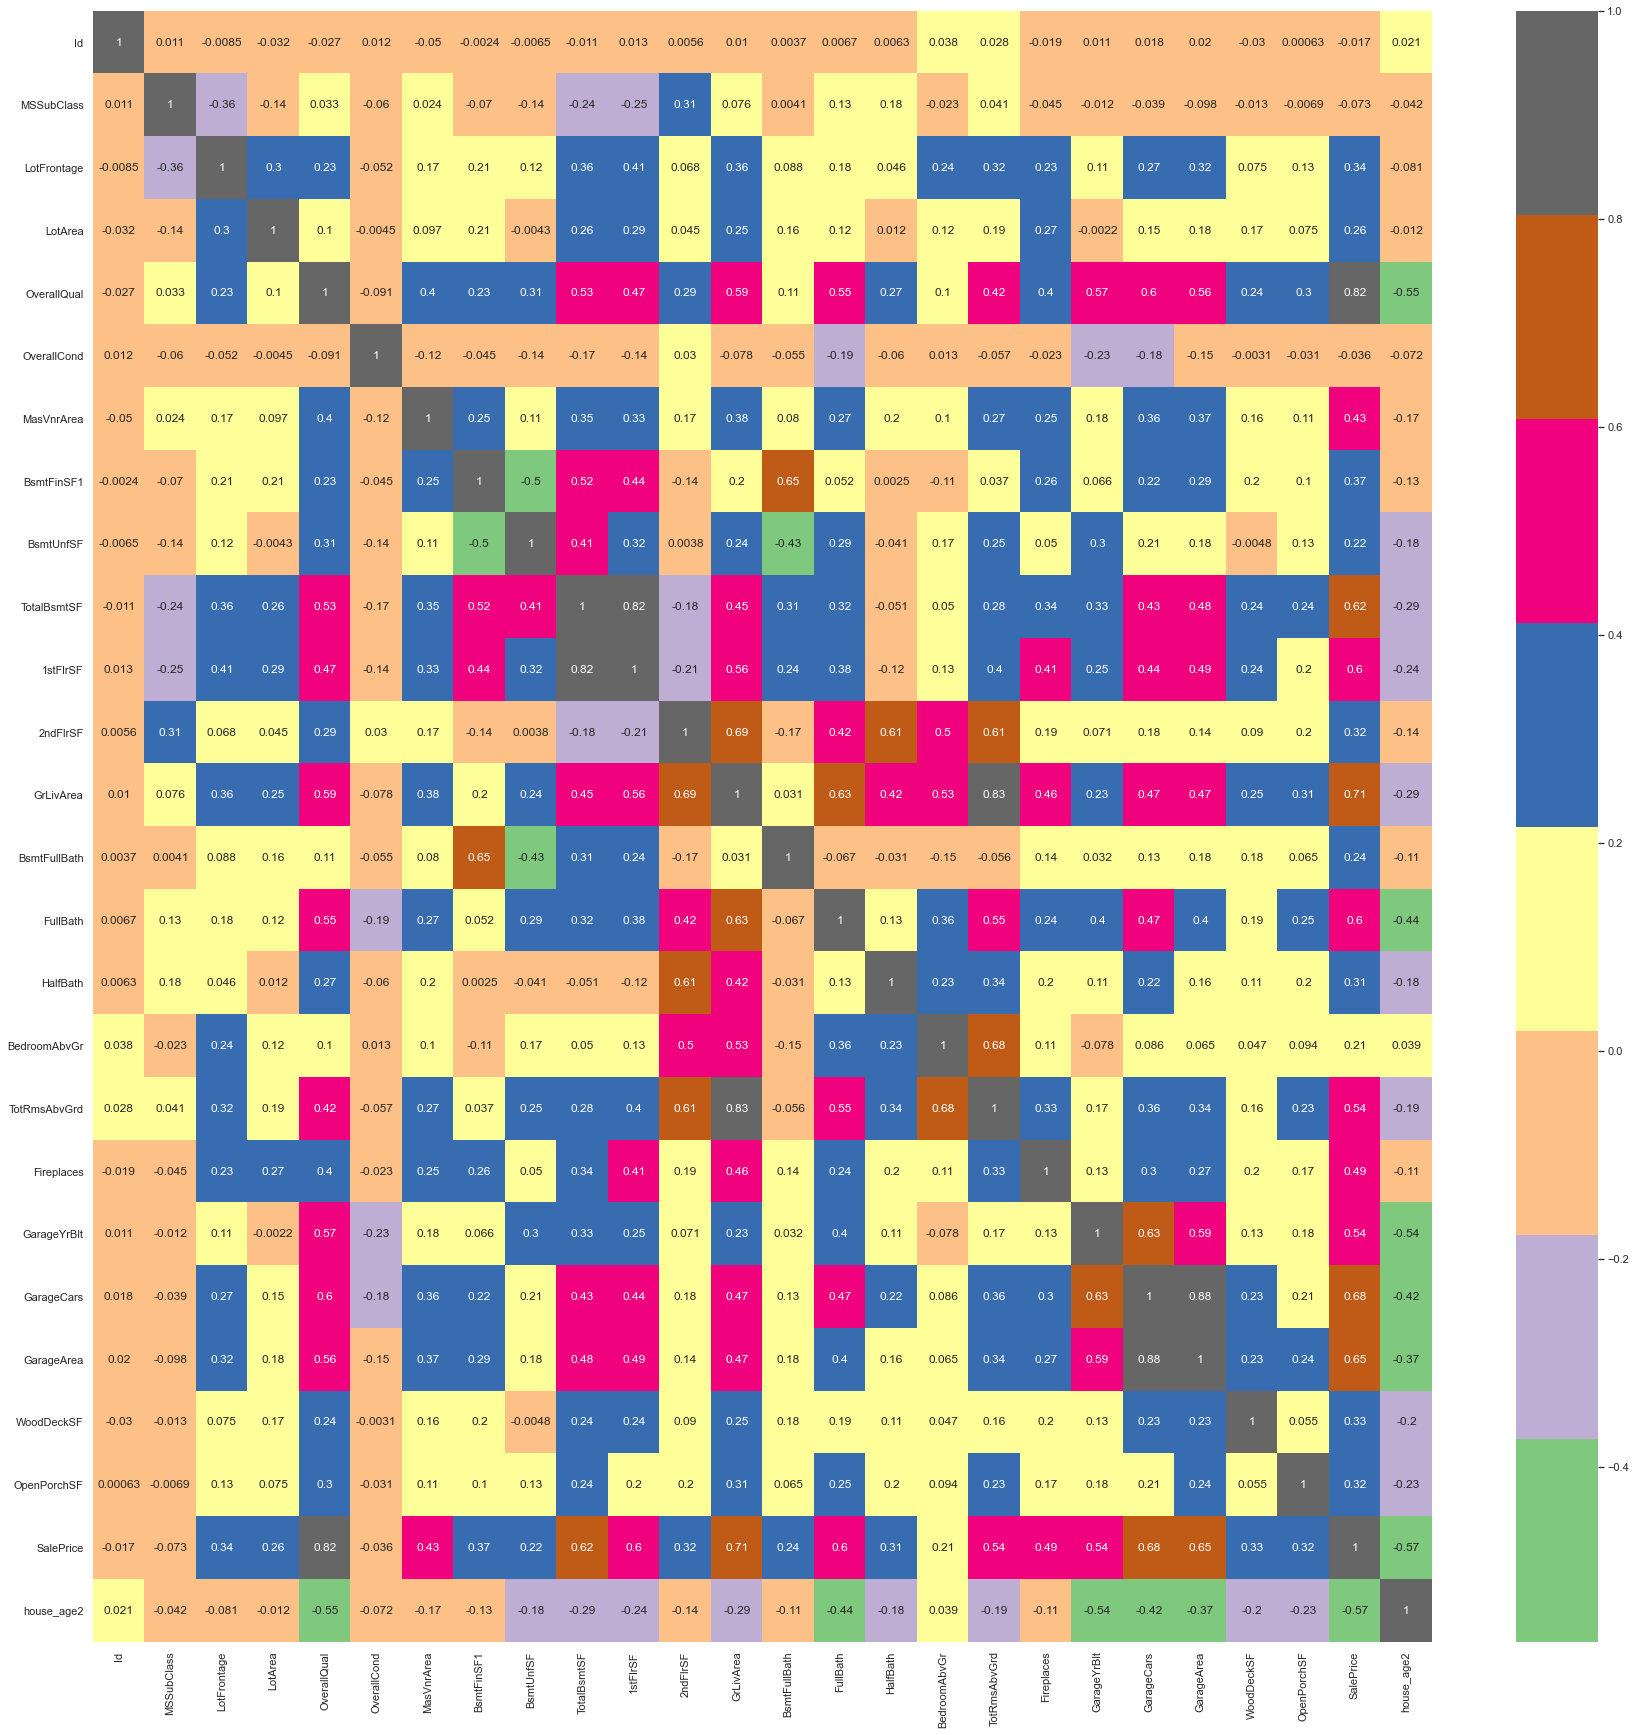

In [78]:
# Using a heat map to check the correlation amoung variables

plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),cmap="Accent", annot=True)
plt.show()

The following are the highly correlated independent variables:
- TotalBsmtSF & 1stFlrSF have 82% correlation
- TotRmsAbvGrd & GrLivArea have 83% correlation
- GarageCars & GarageArea have 88% correlation

Let’s drop 1stFlrSF, TotRmsAbvGrd and GarageArea.

In [79]:
df.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'], axis=1,inplace=True)

###### Plotting all numerical variables in a scatter plot to check the relationship with target variable

In [80]:
# Colleting all numerical variables in a list

num_col=list(df.select_dtypes(['int64','float64']))

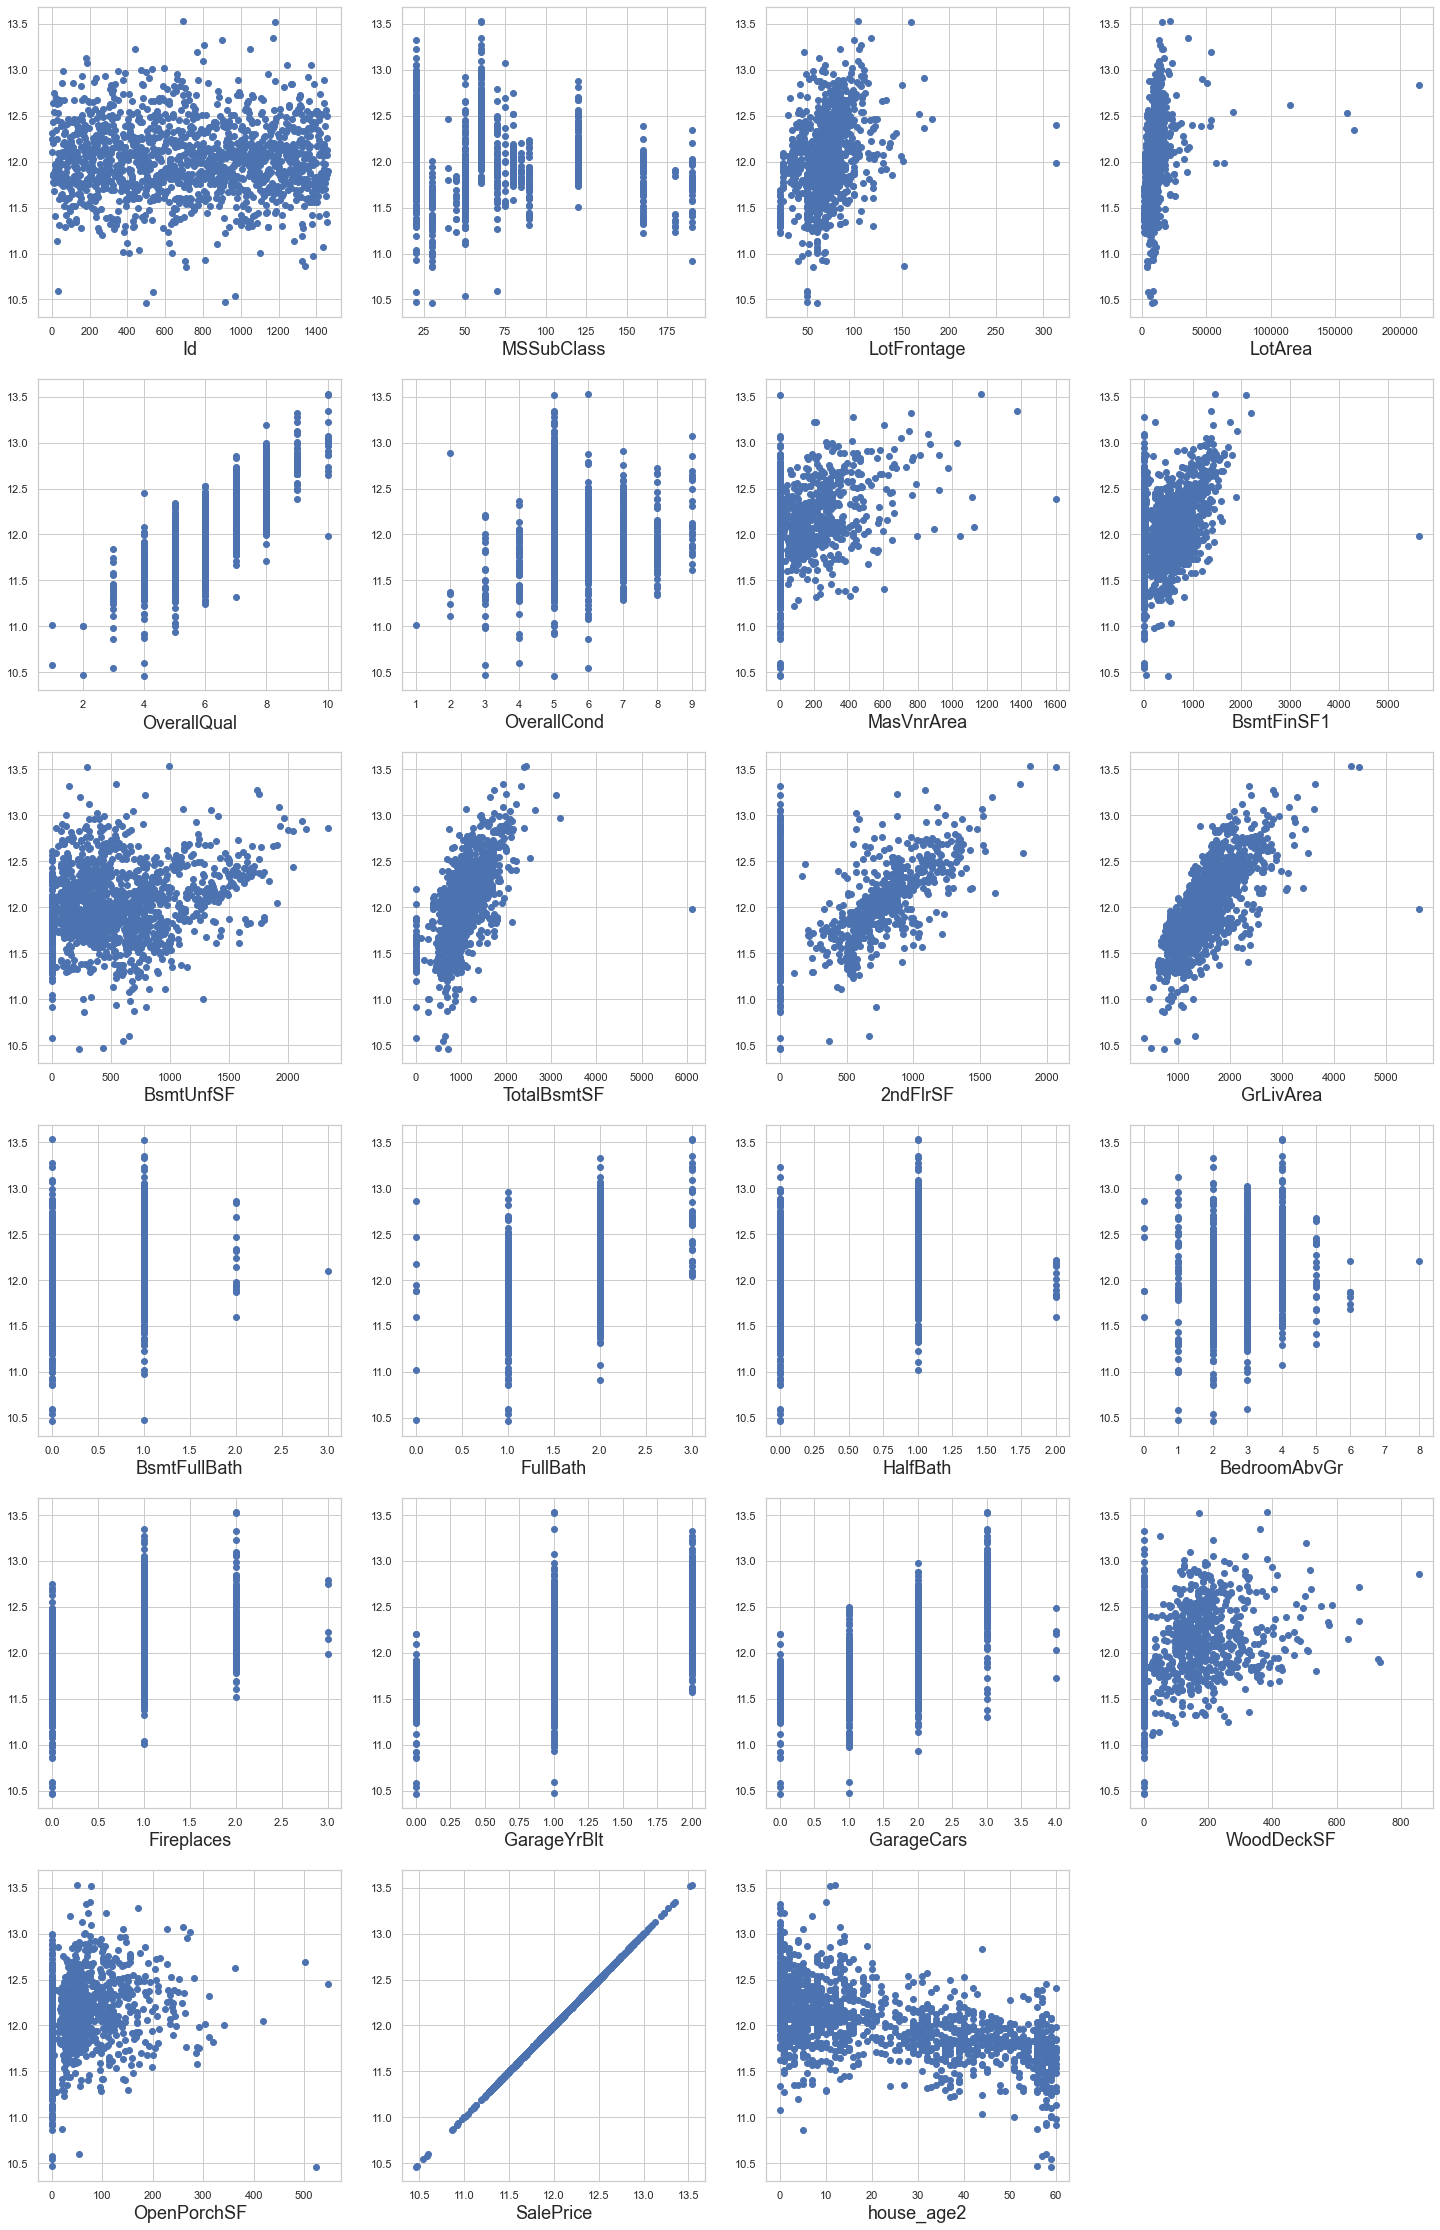

In [81]:
# Creating scatter plot

plt.figure(figsize=(25,40))
for m,n in enumerate(num_col):
    plt.subplot(6,4,(m+1))
    plt.scatter(df[n],df['SalePrice'])
    plt.xlabel(n,fontsize=18)
plt.show()

We could see than many variables are having good positive and negative corelation with the target variable

###### Checking the distribution of target variable against categorical variables

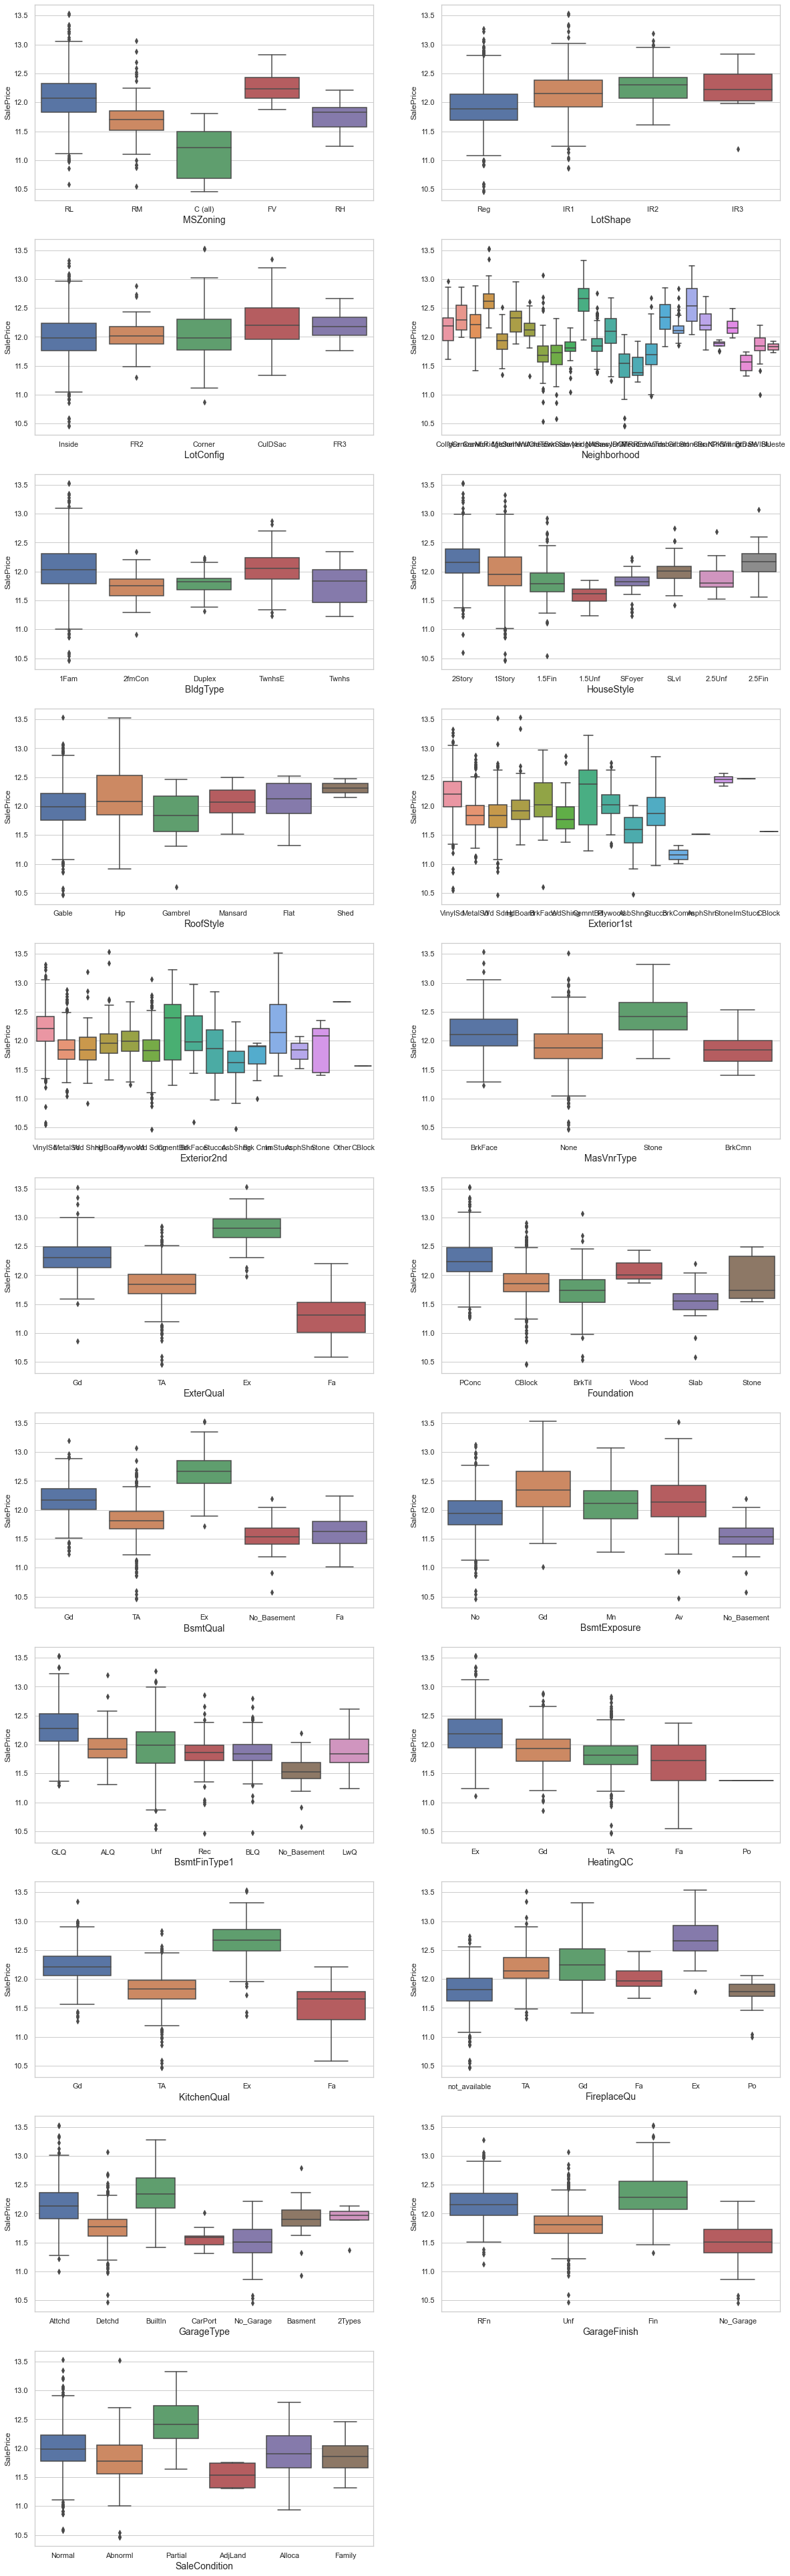

In [82]:
# Let’s checkout the distribution of target variable based on different categories of categorical columns

cat_col=list(df.select_dtypes('object'))
plt.figure(figsize=(20,70))
for m,n in enumerate(cat_col):
    plt.subplot(11,2,(m+1))
    sns.boxplot(x=n, y='SalePrice',data=df)
    plt.xlabel(n, fontsize=14)
plt.show()

### 4. Data Preparation

From the data, we could see that we have ordered categorical, unordered categorical and numeric variables.

Let's check one by one and convert ordered categorical variable into Numeric by adding weightages.

The unordered categorical variables shall be converted to Dummies.

In [83]:
#check for 'object' type columns
cat_columns=df.select_dtypes('object').columns
cat_columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

In [84]:
# Checking the field LotShape which refers the shape of the property

df.LotShape.value_counts()

Reg    925
IR1    481
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [85]:
# Mapping weightage 3,2,1 to the column after referring data dictionaty

df['LotShape']=df['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})

In [86]:
# Checking the column ExterQual which refers the quality of exterior material

df.ExterQual.value_counts()

TA    906
Gd    486
Ex     51
Fa     14
Name: ExterQual, dtype: int64

In [87]:
# Mapping weightage 4,3,2,1,0 based on the quality level mentioned in data dictionary

df['ExterQual']=df['ExterQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

In [88]:
# Checking the column BsmtQual which refers the basement quality

df.BsmtQual.value_counts()

TA             649
Gd             616
Ex             120
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [89]:
# Mapping weightage 5,4,3,2,1,0 based on the quality level mentioned in data dictionary

df['BsmtQual']=df['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No_Basement':0})

In [90]:
# Checking the column BsmtExposure which refers to walkout or garden level walls

df.BsmtExposure.value_counts()

No             952
Av             221
Gd             133
Mn             114
No_Basement     37
Name: BsmtExposure, dtype: int64

In [91]:
# Mapping weightage 4,3,2,1,0 based on the data dictionary

df['BsmtExposure']=df['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'No_Basement':0})

In [92]:
# Checking the column BsmtFinType1 which refers to basement finished area

df.BsmtFinType1.value_counts()

Unf            429
GLQ            416
ALQ            220
BLQ            148
Rec            133
LwQ             74
No_Basement     37
Name: BsmtFinType1, dtype: int64

In [93]:
# Mapping weightage 4,3,2,1,0 based on the data dictionary

df['BsmtFinType1']=df['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No_Basement':0})

In [94]:
# Checking the column HeatingQC which refers to the heating quality and condition

df.HeatingQC.value_counts()

Ex    738
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [95]:
# Mapping weightage 4,3,2,1,0 based on the data dictionary

df['HeatingQC']=df['HeatingQC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

In [96]:
# Checking the column KitchenQual which refers to the Kitchen quality

df.KitchenQual.value_counts()

TA    735
Gd    584
Ex     99
Fa     39
Name: KitchenQual, dtype: int64

In [97]:
# Mapping weightage 4,3,2,1,0 based on the data dictionary

df['KitchenQual']=df['KitchenQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

In [98]:
# Checking the column FireplaceQu which refers to the Fireplace quality

df.FireplaceQu.value_counts()

not_available    690
Gd               378
TA               312
Fa                33
Ex                24
Po                20
Name: FireplaceQu, dtype: int64

In [99]:
# Mapping weightage 5,4,3,2,1,0 based on the data dictionary

df['FireplaceQu']=df['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'not_available':0})

In [100]:
# Checking the column GarageFinish which refers to the garage finish

df.GarageFinish.value_counts()

Unf          605
RFn          420
Fin          351
No_Garage     81
Name: GarageFinish, dtype: int64

In [101]:
# Mapping weightage 5,4,3,2,1,0 based on the data dictionary

df['GarageFinish']=df['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'No_Garage':0})

#### Creating Dummies for the unordered categorical variables

In [102]:
# Collecting all the columns having 'object' datatype into a new variable

unordered_columns=df.select_dtypes('object').columns

In [103]:
# Get dummies of object dtype columns and joining it with the main dataframe

for i in unordered_columns:
    dum_df=pd.get_dummies(df[i],prefix=i,drop_first=True)
    df=pd.concat([df,dum_df],axis=1)
    df.drop(i,axis=1,inplace=True)

In [104]:
# Dropping the Id column as it is not relevant for model building

df.drop('Id',axis=1,inplace=True)

In [105]:
# Checking the final dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Columns: 127 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(28), uint8(96)
memory usage: 540.8 KB


### 5. Train Test Split

In [106]:
# Splitting the data into train and test data

df_train, df_test= train_test_split(df,train_size=0.7,random_state=42)

In [107]:
# Using MinMax scaler to fit the predictors on training data

scaler=MinMaxScaler()
df_train_transformed=scaler.fit_transform(df_train)

In [108]:
# Converting the scalled data array into dataframe

df_train_transformed=pd.DataFrame(df_train_transformed, columns=df_train.columns)

In [109]:
# Using MinMax scaler to transform the test data

df_test_transformed=scaler.transform(df_test)

In [110]:
# Converting the scalled data array into dataframe

df_test_transformed=pd.DataFrame(df_test_transformed, columns=df_test.columns)

#### Dividing into X and y

In [111]:
y_train=df_train_transformed['SalePrice']
X_train=df_train_transformed.drop('SalePrice',axis=1)
y_test=df_test_transformed['SalePrice']
X_test=df_test_transformed.drop('SalePrice',axis=1)

### 6. Model Building and Evaluation

In [112]:
lm=LinearRegression()
lm.fit(X_train,y_train)
y_train_pred= lm.predict(X_train)
y_test_pred= lm.predict(X_test)
print('R2 score of Training data is',(r2_score(y_train,y_train_pred)))
print('R2 score of Testing data is',(r2_score(y_test,y_test_pred)))

R2 score of Training data is 0.9131888463045884
R2 score of Testing data is 0.8899217432553351


Comparing the R2 score for Training and Testing data, we can understand that our model is overfitting. We will use VIF to drop highly correlated features.

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Using function for creating a dataframe with variables and their respective VIF values

def get_VIF_table(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
get_VIF_table(X_train)

,Features,VIF
81,Exterior1st_CBlock,inf
95,Exterior2nd_CBlock,inf
115,GarageType_Attchd,250.15
32,MSZoning_RL,208.84
89,Exterior1st_VinylSd,170.96
104,Exterior2nd_VinylSd,150.65
13,TotalBsmtSF,112.90
119,GarageType_Detchd,111.30
73,RoofStyle_Gable,96.51
85,Exterior1st_MetalSd,93.73


Dropping the variable Exterior2nd_CBlock and checking the VIF values again

In [114]:
X_train=X_train.drop('Exterior2nd_CBlock',axis=1)
X_test=X_test.drop('Exterior2nd_CBlock',axis=1)
get_VIF_table(X_train)

,Features,VIF
114,GarageType_Attchd,250.15
32,MSZoning_RL,208.84
89,Exterior1st_VinylSd,170.96
103,Exterior2nd_VinylSd,150.65
13,TotalBsmtSF,112.90
118,GarageType_Detchd,111.30
73,RoofStyle_Gable,96.51
85,Exterior1st_MetalSd,93.73
16,GrLivArea,90.49
98,Exterior2nd_MetalSd,84.46


Dropping the variable GarageType_Attchd and checking the VIF again

In [115]:
X_train=X_train.drop('GarageType_Attchd',axis=1)
X_test=X_test.drop('GarageType_Attchd',axis=1)
get_VIF_table(X_train)

,Features,VIF
32,MSZoning_RL,185.55
89,Exterior1st_VinylSd,170.59
103,Exterior2nd_VinylSd,150.65
13,TotalBsmtSF,112.43
85,Exterior1st_MetalSd,93.52
73,RoofStyle_Gable,90.04
16,GrLivArea,90.01
98,Exterior2nd_MetalSd,84.46
107,MasVnrType_None,79.79
8,BsmtQual,74.33


Dropping the variable Exterior1st_VinylSd and checking the VIF again

In [116]:
X_train=X_train.drop('Exterior1st_VinylSd',axis=1)
X_test=X_test.drop('Exterior1st_VinylSd',axis=1)
get_VIF_table(X_train)

,Features,VIF
32,MSZoning_RL,184.16
13,TotalBsmtSF,112.31
73,RoofStyle_Gable,90.03
16,GrLivArea,90.01
106,MasVnrType_None,79.65
8,BsmtQual,74.11
4,OverallQual,72.91
0,MSSubClass,65.41
97,Exterior2nd_MetalSd,59.29
85,Exterior1st_MetalSd,54.01


Dropping the variable MSZoning_RL and checking the VIF again

In [117]:
X_train=X_train.drop('MSZoning_RL',axis=1)
X_test=X_test.drop('MSZoning_RL',axis=1)
get_VIF_table(X_train)

,Features,VIF
13,TotalBsmtSF,112.31
16,GrLivArea,89.92
72,RoofStyle_Gable,84.64
105,MasVnrType_None,77.01
8,BsmtQual,73.92
4,OverallQual,71.30
0,MSSubClass,64.93
96,Exterior2nd_MetalSd,59.10
84,Exterior1st_MetalSd,54.00
104,MasVnrType_BrkFace,40.80


In [165]:
X_train=X_train.drop('GrLivArea',axis=1)
X_test=X_test.drop('GrLivArea',axis=1)

In [166]:
X_train=X_train.drop('OverallQual',axis=1)
X_test=X_test.drop('OverallQual',axis=1)

In [167]:
X_train=X_train.drop('GarageCars',axis=1)
X_test=X_test.drop('GarageCars',axis=1)

In [168]:
X_train=X_train.drop('FireplaceQu',axis=1)
X_test=X_test.drop('FireplaceQu',axis=1)

In [169]:
X_train=X_train.drop('OverallCond',axis=1)
X_test=X_test.drop('OverallCond',axis=1)

##### Let's check the R2 scores on the remaining dataset

In [170]:
lm=LinearRegression()
lm.fit(X_train,y_train)
y_train_pred= lm.predict(X_train)
y_test_pred= lm.predict(X_test)
print('Train R2 score is : ',(r2_score(y_train,y_train_pred)))
print('Test R2 score is : ',(r2_score(y_test,y_test_pred)))

Train R2 score is :  0.8822223777108481
Test R2 score is :  0.8423594982834912


As we could see that the model is still overfitting, we will use Ridge and Lasso regression to do further modelling.

#### Ridge Regression

Before starting with Ridge regression, we will start with Grid Search Cross Validation method to find out the best value of hyperparameter alpha.

In [171]:
# params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
#                     9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# ridge=Ridge()
# folds=5
# ridge_model_cv=GridSearchCV(estimator=ridge,
#                            param_grid=params,
#                            scoring='r2',
#                            cv=folds,
#                            return_train_score=True,
#                            verbose=1)
# ridge_model_cv.fit(X_train, y_train)

In [172]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge=Ridge()
folds=5
ridge_model_cv=GridSearchCV(estimator=ridge,
                           param_grid=params,
                           scoring='r2',
                           cv=folds,
                           return_train_score=True,
                           verbose=1)
ridge_model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [173]:
cv_results= pd.DataFrame(ridge_model_cv.cv_results_)

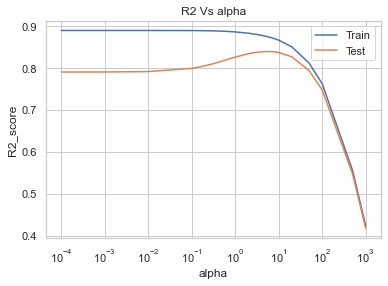

In [174]:
# Plotting R2 score vs alpha value

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.title('R2 Vs alpha')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()


Now, let's check the model’s performance on two different values of alpha i.e. 10 & 100.

In [175]:
alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)
print('Train R2 score is : ',round(r2_score(y_train,y_train_pred),2))
print('Test R2 score is : ',round(r2_score(y_test,y_test_pred),2))


Train R2 score is :  0.87
Test R2 score is :  0.83


In [176]:
alpha=100
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)
print('Train R2 score is : ',round(r2_score(y_train,y_train_pred),2))
print('Test R2 score is : ',round(r2_score(y_test,y_test_pred),2))

Train R2 score is :  0.78
Test R2 score is :  0.76


From the above two results, we can understand that the value of alpa as 10 is more optimal than the alpha value as 100. The alpha value 10 gives us a good model with ideal bias-variance trade off.

In [177]:
# Checking the coefficient values with keeping alpha as 10

alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
print(ridge.coef_)

[-0.02897982  0.02137348  0.02568868 -0.01027423  0.02813803  0.04224606
  0.04576283  0.04004802  0.02671706  0.02430312  0.03394238  0.04265581
  0.02355721  0.07457204  0.02998045  0.08051677  0.03553445  0.04642061
  0.05160336  0.06422557  0.01267016  0.02394521  0.02938506  0.03821742
 -0.03859272 -0.00349262  0.00133407 -0.01661486  0.01923709 -0.01752324
 -0.00112548 -0.00279741 -0.0008837  -0.00444233 -0.00519628  0.00026699
 -0.01162546  0.04219539 -0.03514417 -0.02476061 -0.03445506 -0.03312682
 -0.00824195 -0.00667517  0.01105671  0.00188956  0.03613921  0.03616373
 -0.01591565 -0.00988196 -0.02054428 -0.0068002   0.01165064  0.04475376
  0.0084834   0.02450191  0.00116375  0.00681678 -0.03373052 -0.02297567
 -0.00048034 -0.00571823  0.02815569  0.01313612 -0.00947222 -0.00912147
 -0.00677727 -0.01602995 -0.0020355   0.0066806  -0.00036229  0.00155082
  0.00483659 -0.01180293  0.0375069  -0.00541283  0.00648242 -0.00310458
  0.00274897 -0.0028153   0.01067945  0.01426501  0

In [178]:
# Creating a dictionary with the details of variables and coefficients obtained in Rigde regression

ridge_dict=dict(zip(X_train.columns,ridge.coef_))

In [179]:
# Selecting only non-zero coefficients from the dictionary

final_dict={}
for i in ridge_dict:
    if ridge_dict[i]!=0:
        final_dict[i]= round(ridge_dict[i],3)    #rounding coefficient to 3 significant digits
final_dict

{'MSSubClass': -0.029,
 'LotFrontage': 0.021,
 'LotArea': 0.026,
 'LotShape': -0.01,
 'MasVnrArea': 0.028,
 'ExterQual': 0.042,
 'BsmtQual': 0.046,
 'BsmtExposure': 0.04,
 'BsmtFinType1': 0.027,
 'BsmtFinSF1': 0.024,
 'BsmtUnfSF': 0.034,
 'TotalBsmtSF': 0.043,
 'HeatingQC': 0.024,
 '2ndFlrSF': 0.075,
 'BsmtFullBath': 0.03,
 'FullBath': 0.081,
 'HalfBath': 0.036,
 'BedroomAbvGr': 0.046,
 'KitchenQual': 0.052,
 'Fireplaces': 0.064,
 'GarageYrBlt': 0.013,
 'GarageFinish': 0.024,
 'WoodDeckSF': 0.029,
 'OpenPorchSF': 0.038,
 'house_age2': -0.039,
 'MSZoning_FV': -0.003,
 'MSZoning_RH': 0.001,
 'MSZoning_RM': -0.017,
 'LotConfig_CulDSac': 0.019,
 'LotConfig_FR2': -0.018,
 'LotConfig_FR3': -0.001,
 'LotConfig_Inside': -0.003,
 'Neighborhood_Blueste': -0.001,
 'Neighborhood_BrDale': -0.004,
 'Neighborhood_BrkSide': -0.005,
 'Neighborhood_ClearCr': 0.0,
 'Neighborhood_CollgCr': -0.012,
 'Neighborhood_Crawfor': 0.042,
 'Neighborhood_Edwards': -0.035,
 'Neighborhood_Gilbert': -0.025,
 'Neighborh

In [180]:
# Sorting the final dintionary in descending order of the coefficient values.

import operator
final_dict= dict(sorted(final_dict.items(), key=operator.itemgetter(1), reverse=True))

In [181]:
final_dict

{'FullBath': 0.081,
 '2ndFlrSF': 0.075,
 'Fireplaces': 0.064,
 'KitchenQual': 0.052,
 'BsmtQual': 0.046,
 'BedroomAbvGr': 0.046,
 'Neighborhood_StoneBr': 0.045,
 'TotalBsmtSF': 0.043,
 'ExterQual': 0.042,
 'Neighborhood_Crawfor': 0.042,
 'BsmtExposure': 0.04,
 'OpenPorchSF': 0.038,
 'Exterior1st_BrkFace': 0.038,
 'HalfBath': 0.036,
 'Neighborhood_NoRidge': 0.036,
 'Neighborhood_NridgHt': 0.036,
 'BsmtUnfSF': 0.034,
 'BsmtFullBath': 0.03,
 'WoodDeckSF': 0.029,
 'MasVnrArea': 0.028,
 'HouseStyle_2.5Fin': 0.028,
 'BsmtFinType1': 0.027,
 'LotArea': 0.026,
 'SaleCondition_Alloca': 0.026,
 'Neighborhood_Veenker': 0.025,
 'BsmtFinSF1': 0.024,
 'HeatingQC': 0.024,
 'GarageFinish': 0.024,
 'Foundation_PConc': 0.024,
 'SaleCondition_Partial': 0.023,
 'LotFrontage': 0.021,
 'LotConfig_CulDSac': 0.019,
 'Exterior2nd_Wd Sdng': 0.016,
 'MasVnrType_Stone': 0.015,
 'Exterior1st_Stone': 0.014,
 'SaleCondition_Normal': 0.014,
 'GarageYrBlt': 0.013,
 'HouseStyle_2.5Unf': 0.013,
 'Neighborhood_Somerst': 0

#### Lasso Regression

Let’s now use Lasso regression technique to see how it helps in elimination of non relevant features

We will first use the Grid Search Cross Validation method to find
the best value of hyperparameter alpha for Lasso regression model.

In [182]:
lasso=Lasso()
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}
folds=5
lasso_model_cv=GridSearchCV(estimator=lasso,
                           param_grid=params,
                           scoring='r2',
                            cv=folds,
                            return_train_score=True,
                           verbose=1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100, 500, 1000, 10000]},
             return_train_score=True, scoring='r2', verbose=1)

In [183]:
cv_results= pd.DataFrame(lasso_model_cv.cv_results_)

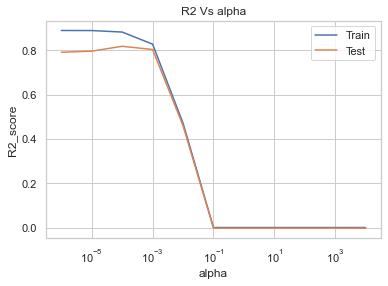

In [184]:
# Plotting R2 score vs alpha value

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.title('R2 Vs alpha')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

Now, let's check the model’s performance on two different values of alpha i.e. 0.0001 & 0.001.

In [185]:
alph= 0.0001
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)
y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)
print('Train R2 score is : ',round(r2_score(y_train,y_train_pred),2))
print('Test R2 score is : ',round(r2_score(y_test,y_test_pred),2))

Train R2 score is :  0.88
Test R2 score is :  0.84


In [186]:
alph= 0.001
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)
y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)
print('Train R2 score is : ',round(r2_score(y_train,y_train_pred),2))
print('Test R2 score is : ',round(r2_score(y_test,y_test_pred),2))

Train R2 score is :  0.82
Test R2 score is :  0.8


From above results we can understand that the alpha value of 0.001 is better than 0.0001.

In [187]:
# Checking the coefficient values with keeping alpha as 0.001

alph= 0.001
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.04051603  0.          0.         -0.          0.          0.05475157
  0.057371    0.04462592  0.02148054  0.          0.00996234  0.03139535
  0.00532299  0.07788063  0.02742336  0.12174052  0.02518533  0.
  0.07000448  0.0907347   0.          0.02894043  0.00056172  0.00979659
 -0.03550455  0.          0.         -0.0298204   0.01317175 -0.
 -0.         -0.00021887 -0.         -0.          0.          0.
 -0.          0.0244908  -0.01926052 -0.01036791 -0.         -0.
 -0.          0.          0.          0.          0.02680903  0.02516007
 -0.         -0.         -0.         -0.          0.          0.00913832
  0.          0.          0.          0.         -0.00782012 -0.
 -0.          0.          0.          0.         -0.         -0.
 -0.         -0.01825363 -0.          0.00572979 -0.          0.
  0.         -0.          0.02105756 -0.          0.         -0.
  0.          0.          0.          0.         -0.          0.
 -0.          0.         -0.          0.          

In [188]:
# Creating a dictionary with the details of variables and coefficients obtained in lasso regression

lasso_dict=dict(zip(X_train.columns,lasso.coef_))

In [189]:
# Selecting only non-zero coefficients from the dictionary

final_dict_lasso={}
for i in lasso_dict:
    if lasso_dict[i]!=0:
        final_dict_lasso[i]= round(lasso_dict[i],3)    #rounding coefficient to 3 significant digits
final_dict_lasso

{'MSSubClass': -0.041,
 'ExterQual': 0.055,
 'BsmtQual': 0.057,
 'BsmtExposure': 0.045,
 'BsmtFinType1': 0.021,
 'BsmtUnfSF': 0.01,
 'TotalBsmtSF': 0.031,
 'HeatingQC': 0.005,
 '2ndFlrSF': 0.078,
 'BsmtFullBath': 0.027,
 'FullBath': 0.122,
 'HalfBath': 0.025,
 'KitchenQual': 0.07,
 'Fireplaces': 0.091,
 'GarageFinish': 0.029,
 'WoodDeckSF': 0.001,
 'OpenPorchSF': 0.01,
 'house_age2': -0.036,
 'MSZoning_RM': -0.03,
 'LotConfig_CulDSac': 0.013,
 'LotConfig_Inside': -0.0,
 'Neighborhood_Crawfor': 0.024,
 'Neighborhood_Edwards': -0.019,
 'Neighborhood_Gilbert': -0.01,
 'Neighborhood_NoRidge': 0.027,
 'Neighborhood_NridgHt': 0.025,
 'Neighborhood_StoneBr': 0.009,
 'BldgType_Twnhs': -0.008,
 'RoofStyle_Gable': -0.018,
 'RoofStyle_Hip': 0.006,
 'Exterior1st_BrkFace': 0.021,
 'Exterior2nd_VinylSd': -0.003,
 'MasVnrType_None': -0.012,
 'MasVnrType_Stone': 0.001,
 'Foundation_PConc': 0.018,
 'GarageType_Detchd': -0.003,
 'GarageType_No_Garage': -0.034,
 'SaleCondition_Partial': 0.008}

In [190]:
# Finding the number of coefficients in the final dictionary

len(final_dict_lasso)

38

In [191]:
# Sorting the final dintionary in descending order of the coefficient values.

import operator
final_dict_lasso= dict(sorted(final_dict_lasso.items(), key=operator.itemgetter(1), reverse=True))

In [192]:
final_dict_lasso

{'FullBath': 0.122,
 'Fireplaces': 0.091,
 '2ndFlrSF': 0.078,
 'KitchenQual': 0.07,
 'BsmtQual': 0.057,
 'ExterQual': 0.055,
 'BsmtExposure': 0.045,
 'TotalBsmtSF': 0.031,
 'GarageFinish': 0.029,
 'BsmtFullBath': 0.027,
 'Neighborhood_NoRidge': 0.027,
 'HalfBath': 0.025,
 'Neighborhood_NridgHt': 0.025,
 'Neighborhood_Crawfor': 0.024,
 'BsmtFinType1': 0.021,
 'Exterior1st_BrkFace': 0.021,
 'Foundation_PConc': 0.018,
 'LotConfig_CulDSac': 0.013,
 'BsmtUnfSF': 0.01,
 'OpenPorchSF': 0.01,
 'Neighborhood_StoneBr': 0.009,
 'SaleCondition_Partial': 0.008,
 'RoofStyle_Hip': 0.006,
 'HeatingQC': 0.005,
 'WoodDeckSF': 0.001,
 'MasVnrType_Stone': 0.001,
 'LotConfig_Inside': -0.0,
 'Exterior2nd_VinylSd': -0.003,
 'GarageType_Detchd': -0.003,
 'BldgType_Twnhs': -0.008,
 'Neighborhood_Gilbert': -0.01,
 'MasVnrType_None': -0.012,
 'RoofStyle_Gable': -0.018,
 'Neighborhood_Edwards': -0.019,
 'MSZoning_RM': -0.03,
 'GarageType_No_Garage': -0.034,
 'house_age2': -0.036,
 'MSSubClass': -0.041}

In [193]:
# Creating the final model equation by substituting the coefficient values.

a= ' + '.join(([str(b)+' X '+str(a) for a,b in final_dict_lasso.items()]))
print("Sales Price = {0}+ [ {1} ]".format(round(lasso.intercept_,3),a))

Sales Price = 0.282+ [ 0.122 X FullBath + 0.091 X Fireplaces + 0.078 X 2ndFlrSF + 0.07 X KitchenQual + 0.057 X BsmtQual + 0.055 X ExterQual + 0.045 X BsmtExposure + 0.031 X TotalBsmtSF + 0.029 X GarageFinish + 0.027 X BsmtFullBath + 0.027 X Neighborhood_NoRidge + 0.025 X HalfBath + 0.025 X Neighborhood_NridgHt + 0.024 X Neighborhood_Crawfor + 0.021 X BsmtFinType1 + 0.021 X Exterior1st_BrkFace + 0.018 X Foundation_PConc + 0.013 X LotConfig_CulDSac + 0.01 X BsmtUnfSF + 0.01 X OpenPorchSF + 0.009 X Neighborhood_StoneBr + 0.008 X SaleCondition_Partial + 0.006 X RoofStyle_Hip + 0.005 X HeatingQC + 0.001 X WoodDeckSF + 0.001 X MasVnrType_Stone + -0.0 X LotConfig_Inside + -0.003 X Exterior2nd_VinylSd + -0.003 X GarageType_Detchd + -0.008 X BldgType_Twnhs + -0.01 X Neighborhood_Gilbert + -0.012 X MasVnrType_None + -0.018 X RoofStyle_Gable + -0.019 X Neighborhood_Edwards + -0.03 X MSZoning_RM + -0.034 X GarageType_No_Garage + -0.036 X house_age2 + -0.041 X MSSubClass ]


### Residual Analysis of the train data

The next step is to check whether the error terms are also normally distributed. For this we need to plot the histogram of the error terms.

In [ ]:
# Plotting histogram of error terms to see the distribution

sns.distplot(y_train-y_train_pred)
plt.title('Error Distribution of Training Data')
plt.xlabel('Error')

In [ ]:
# Checking heteroscedasticity using residual plot 

x= [i for i in range (1,y_train.shape[0]+1,1)]
plt.scatter(x,y_train-y_train_pred)
plt.title('Error Distribution')
plt.ylabel('Residuals')
plt.xticks([])
plt.show()

From the above chart, we understand that there is no heteroscedasticity in residual plot.

In [ ]:
# Checking the relationship between Actual Vs Predicted values.

plt.scatter(y_train, y_train_pred, marker='*')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

From the above plot, we can clearly observe a linear relationship between actual vs prdicted values of our target variable on train set.

### Residual Analysis of the test data

In [ ]:
# Plotting histogram of error terms to see the distribution

sns.distplot(y_test-y_test_pred)
plt.title('Error Distribution of Testing Data')
plt.xlabel('Error')

In [ ]:
# Checking heteroscedasticity using residual plot 

x= [i for i in range (1,439,1)]
plt.scatter(x,y_test-y_test_pred)
plt.title('Error Distribution')
plt.ylabel('Residuals')
plt.xticks([])
plt.show()

From the above chart, we can understand that there is no heteroscedasticity

In [ ]:
# Checking the relationship between Actual Vs Predicted

plt.scatter(y_test, y_test_pred, marker='*')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

From the above plot, we can clearly observe a linear relationship between actual vs prdicted values of our target variable on testing set.

From the above analysis, it is clear that both train and test data fits the assumptions of Linear Regression.

- Residuals have mean of zero and closely normally distributed.
- Residuals do not have any pattern hence it has homoscedasticity.

Our final model equation is:

Sales Price = 0.161+ [ 0.271 X GrLivArea + 0.221 X GrLivArea + 0.101 X GarageCars + 0.039 X FireplaceQu + 0.037 X FullBath + 0.035 X OverallCond + 0.031 X BsmtFinType1 + 0.03 X BsmtExposure + 0.026 X BsmtQual + 0.023 X KitchenQual + 0.02 X GarageFinish + 0.012 X Foundation_PConc + 0.012 X SaleCondition_Partial + 0.01 X HeatingQC + 0.01 X BsmtFullBath + 0.01 X Exterior1st_BrkFace + 0.009 X LotConfig_CulDSac + 0.008 X Neighborhood_NridgHt + 0.006 X Neighborhood_Crawfor + 0.005 X HalfBath + 0.004 X SaleCondition_Normal + 0.002 X ExterQual + 0.001 X WoodDeckSF + 0.0 X Fireplaces + -0.0 X MasVnrType_None + -0.006 X GarageType_Detchd + -0.009 X RoofStyle_Gable + -0.011 X Neighborhood_Edwards + -0.023 X MSSubClass + -0.023 X house_age2 + -0.033 X MSZoning_RM ]

### Conclusion

Top 5 variables which affect the sale price positively are:-

- GrLivArea
- GarageCars
- FireplaceQu
- FullBath
- OverallCond

Top 5 variables which affect the sale price negatively are:-

- MSZoning_RM
- house_age2
- MSSubClass
- Neighborhood_Edwards
- RoofStyle_Gable

We can summarize that a well-balanced approach using Ridge and Lasso techniques would help us for creating a better performing model.